In [1]:
from __future__ import print_function, division
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [2]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_SSMIS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB1 = nc_fid.variables["fcdr_tb91h_img2"][:]  # shape lat, lon as shown above
    TB2 = nc_fid.variables["fcdr_tb91v_img2"][:]  # shape lat, lon as shown above
    TB3 = nc_fid.variables["tb183_7h_img1"][:]  # shape lat, lon as shown above
    lats = nc_fid.variables['lat_img2'][:]  # extract/copy the data
    lons = nc_fid.variables['lon_img2'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB1, TB2, TB3, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    RR = nc_fid.variables["Band1"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return RR, lat, lon, names

def make_radar_mask(RR,lat,lon):
    RR[RR>15]=15
    print('RR shape', RR.shape, RR)
    RR_8 = ma.masked_where(RR < 8, RR)
    print('RR_8 shape', RR_8.shape)
    RR_7 = ma.masked_where(RR < 7, RR)
    print('RR_7 shape', RR_7.shape)
    lonz,latz = np.meshgrid(lon,lat)
    print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)
    return RR_8, RR_7, lonz, latz

RR_file_UK = 'metoffice-c-band-rain-radar_uk_202210231615_1km-composite.tif.nc'
RR_UK, lat_uk, lon_uk, names = read_radar_plot(RR_file_UK)
RR_UK = np.nan_to_num(RR_UK)
print(names)
print('RR_UK shape', RR_UK.shape, RR_UK)
RR_UK_max = np.amax(RR_UK)
RR_UK_min = np.amin(RR_UK)
print('RR_UK min, RR_UK max', RR_UK_min, RR_UK_max)
print('lat shape, lon shape', lat_uk.shape, lon_uk.shape)

RR_8_UK, RR_7_UK, lonz_uk, latz_uk = make_radar_mask(RR_UK, lat_uk, lon_uk) 

SSMIS_file = 'CSU_SSMIS_ICDR_V01R01_F18_D20221023_S1557_E1739_R67121.nc'
TB1, TB2, TB3, lats, lons, names = read_SSMIS_plot(SSMIS_file)

TB1 = TB1[330:500,:]
lats = lats[330:500,:]
lons = lons[330:500,:]
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
TB1_max = np.amax(TB1) 
TB1_min = np.amin(TB1)
print("TB1 max =", TB1_max)
print("TB1 min =", TB1_min)
print("TB1 = ", TB1, TB1.shape)
TB2 = TB2[330:500,:]
TB2_max = np.amax(TB2)
TB2_min = np.amin(TB2)
print("TB2 max =", TB2_max)
print("TB2 min =", TB2_min)
print("TB2 = ", TB2, TB2.shape)

TB3 = TB3[330:500,:]
TB3_max = np.amax(TB3)
TB3_min = np.amin(TB3)
print("TB3 max =", TB3_max)
print("TB3 min =", TB3_min)
print("TB3 = ", TB3, TB3.shape)

print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)                        

/tmp/ipykernel_13748/1877308136.py:17: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  RR = nc_fid.variables["Band1"][:]  # shape lat, lon as shown above


dict_keys(['crs', 'lat', 'lon', 'Band1', 'Band2'])
RR_UK shape (1670, 2829) [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
RR_UK min, RR_UK max 1 15
lat shape, lon shape (1670,) (2829,)
RR shape (1670, 2829) [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
RR_8 shape (1670, 2829)
RR_7 shape (1670, 2829)
lats shape, lons shape (1670, 2829) (1670, 2829) [[43.70172405 43.70172405 43.70172405 ... 43.70172405 43.70172405
  43.70172405]
 [43.71377451 43.71377451 43.71377451 ... 43.71377451 43.71377451
  43.71377451]
 [43.72582496 43.72582496 43.72582496 ... 43.72582496 43.72582496
  43.72582496]
 ...
 [63.78983319 63.78983319 63.78983319 ... 63.78983319 63.78983319
  63.78983319]
 [63.80188364 63.80188364 63.80188364 ... 63.80188364 63.80188364
  63.80188364]
 [63.8139341  63.813

PCT mean =  279.00195
PCT max = 293.3423
PCT min = 171.53365
PCT =  [[291.03027 288.67056 289.05045 ... 285.8     283.78772 284.03485]
 [290.78302 290.31494 290.22418 ... 284.3674  285.76648 284.69406]
 [290.40756 289.60867 289.13184 ... 284.10333 286.39893 283.1831 ]
 ...
 [282.0066  281.71436 281.26065 ... 281.42767 281.47696 280.88538]
 [282.34775 281.27618 281.34482 ... 281.98206 281.55597 282.0771 ]
 [279.6671  280.73117 281.7467  ... 282.72003 281.3813  280.85895]] (170, 180)


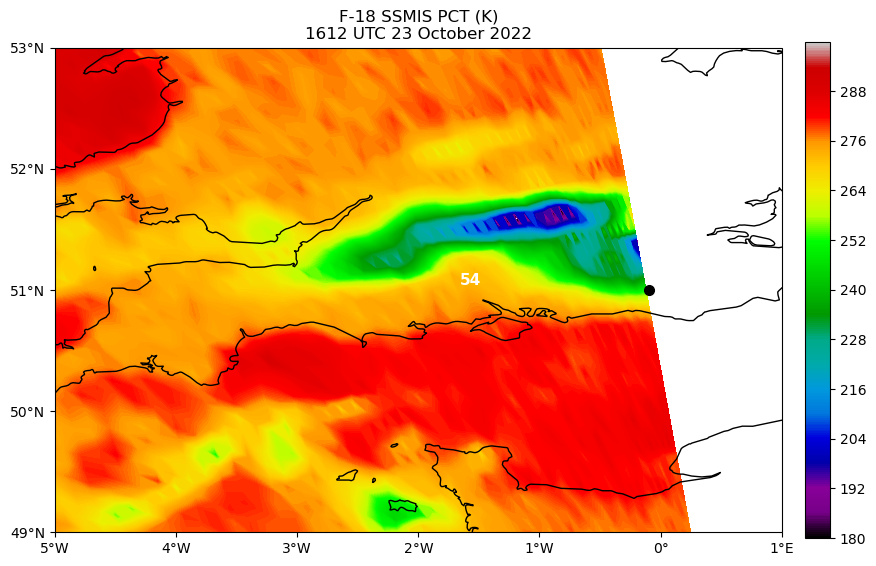

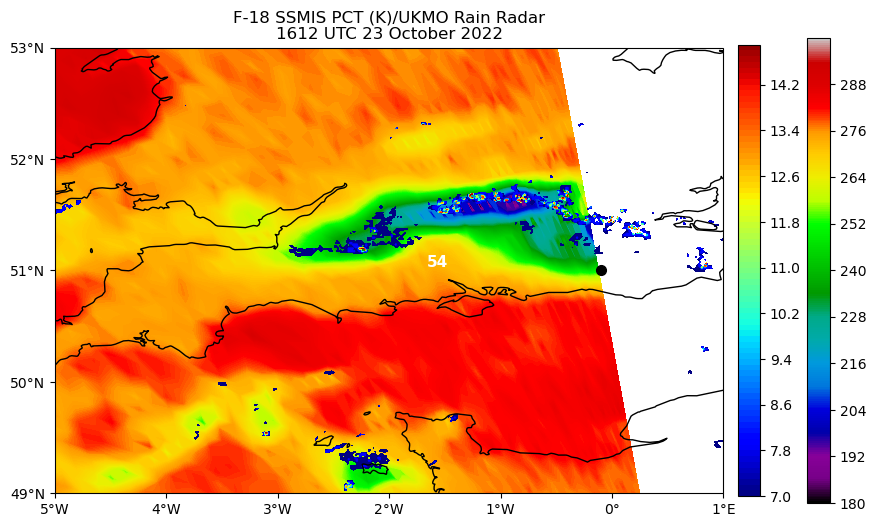

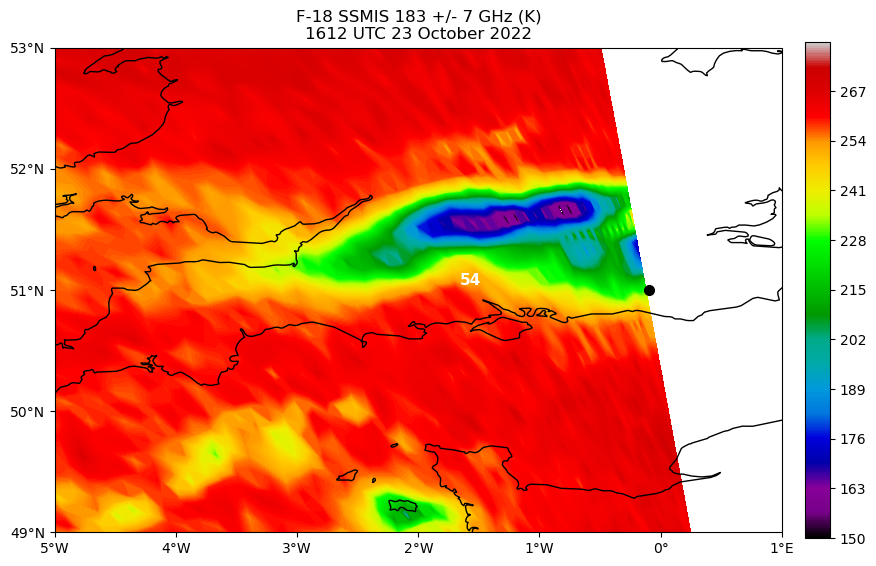

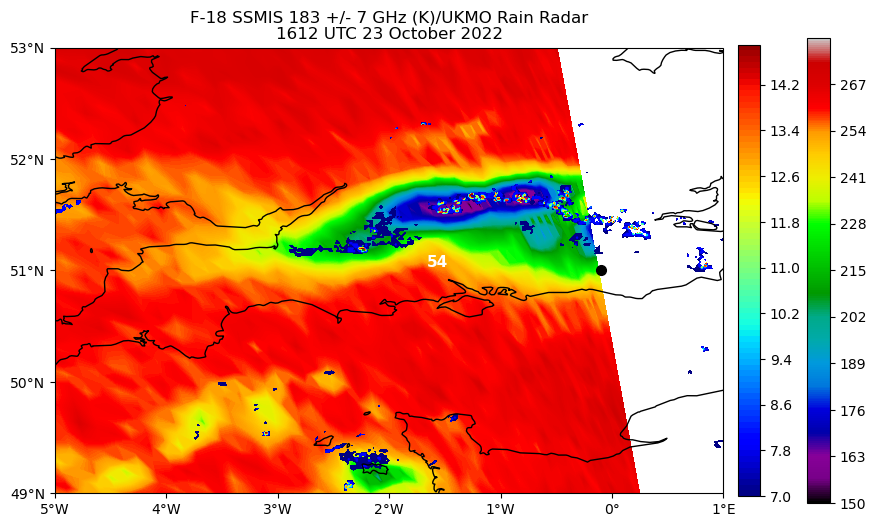

In [3]:
"""
SI150 = TB1 - TB3
SI150_max = np.amax(SI150)
SI150_min = np.amin(SI150)
print("SI150 max =", SI150_max)
print("SI150 min =", SI150_min)
print("SI150 = ", SI150, SI150.shape)
"""
PCT = (1.818*TB2)-(0.818*TB1)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('F-18 SSMIS PCT (K)\n'
          '1612 UTC 23 October 2022')

Tlevels = np.arange(180,300,0.1)
cbtd = ax.contourf(lons,lats,PCT,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_pct_1612.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('F-18 SSMIS PCT (K)/UKMO Rain Radar\n'
          '1612 UTC 23 October 2022')

Tlevels = np.arange(180,300,0.1)
cbtd = ax.contourf(lons,lats,PCT,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
RRlevels = np.arange(7,15,0.1)
cRR = ax.contourf(lonz_uk,latz_uk,RR_7_UK,RRlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=7,vmax=15)

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.03,pad=0.06)
cbar2=plt.colorbar(cRR,fraction=0.032,pad=0.02)
plt.savefig("ssmis_pct_ukmo_rr_1612.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('F-18 SSMIS 183 +/- 7 GHz (K)\n'
          '1612 UTC 23 October 2022')

Tlevels = np.arange(150,280,0.1)
cbtd = ax.contourf(lons,lats,TB3,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_183_7h_1612.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('F-18 SSMIS 183 +/- 7 GHz (K)/UKMO Rain Radar\n'
          '1612 UTC 23 October 2022')

Tlevels = np.arange(150,280,0.1)
cbtd = ax.contourf(lons,lats,TB3,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
RRlevels = np.arange(7,15,0.1)
cRR = ax.contourf(lonz_uk,latz_uk,RR_7_UK,RRlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=7,vmax=15)

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.03,pad=0.06)
cbar2=plt.colorbar(cRR,fraction=0.032,pad=0.02)
plt.savefig("ssmis_183_7h_ukmo_rr_1612.png",dpi=250,bbox_inches='tight')
plt.show()

In [2]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

def read_SSMIS_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    TB1 = nc_fid.variables["fcdr_tb91h_img2"][:]  # shape lat, lon as shown above
    TB2 = nc_fid.variables["fcdr_tb91v_img2"][:]  # shape lat, lon as shown above
    TB3 = nc_fid.variables["tb150h_img1"][:]  # shape lat, lon as shown above
    TB4 = nc_fid.variables["tb183_7h_img1"][:]  # shape lat, lon as shown above
    lats = nc_fid.variables['lat_img2'][:]  # extract/copy the data
    lons = nc_fid.variables['lon_img2'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return TB1, TB2, TB3, TB4, lats, lons, names

def read_radar_plot(ncf):
    nc_fid = Dataset(ncf, 'r')
    RR = nc_fid.variables["Band1"][:]  # shape lat, lon as shown above
    lat = nc_fid.variables['lat'][:]  # extract/copy the data
    lon = nc_fid.variables['lon'][:]
    names = nc_fid.variables.keys()
    nc_fid.close()
    return RR, lat, lon, names

def make_radar_mask(RR,lat,lon):
    RR[RR>15]=15
    print('RR shape', RR.shape, RR)
    RR_5 = ma.masked_where(RR < 5, RR)
    print('RR_5 shape', RR_5.shape)
    RR_7 = ma.masked_where(RR < 7, RR)
    print('RR_7 shape', RR_7.shape)
    lonz,latz = np.meshgrid(lon,lat)
    print('lats shape, lons shape', latz.shape, lonz.shape, latz,lonz)
    return RR_5, RR_7, lonz, latz

RR_file_UK = 'metoffice-c-band-rain-radar_uk_202210231645_1km-composite.tif.nc'
RR_UK, lat_uk, lon_uk, names = read_radar_plot(RR_file_UK)
RR_UK = np.nan_to_num(RR_UK)
print(names)
print('RR_UK shape', RR_UK.shape, RR_UK)
RR_UK_max = np.amax(RR_UK)
RR_UK_min = np.amin(RR_UK)
print('RR_UK min, RR_UK max', RR_UK_min, RR_UK_max)
print('lat shape, lon shape', lat_uk.shape, lon_uk.shape)

RR_5_UK, RR_7_UK, lonz_uk, latz_uk = make_radar_mask(RR_UK, lat_uk, lon_uk) 

SSMIS_file = 'CSU_SSMIS_ICDR_V01R01_F16_D20221023_S1644_E1826_R98111.nc'
TB1, TB2, TB3, TB4, lats, lons, names = read_SSMIS_plot(SSMIS_file)

TB1 = TB1[0:200,:]
lats = lats[0:200,:]
lons = lons[0:200,:]
lats_mn = np.mean(lats)
lons_mn = np.mean(lons)
print("Lats mean= ", lats_mn)
print("Lons mean= ", lons_mn)
TB1_max = np.amax(TB1) 
TB1_min = np.amin(TB1)
print("TB1 max =", TB1_max)
print("TB1 min =", TB1_min)
print("TB1 = ", TB1, TB1.shape)
TB2 = TB2[0:200,:]
TB2_max = np.amax(TB2)
TB2_min = np.amin(TB2)
print("TB2 max =", TB2_max)
print("TB2 min =", TB2_min)
print("TB2 = ", TB2, TB2.shape)

TB3 = TB3[0:200,:]
TB3_max = np.amax(TB3)
TB3_min = np.amin(TB3)
print("TB3 max =", TB3_max)
print("TB3 min =", TB3_min)
print("TB3 = ", TB3, TB3.shape)

TB4 = TB4[0:200,:]
TB4_max = np.amax(TB4)
TB4_min = np.amin(TB4)
print("TB4 max =", TB4_max)
print("TB4 min =", TB4_min)
print("TB4 = ", TB4, TB4.shape)

print("Lats = ", lats, lats.shape)
print("Lons = ", lons, lons.shape)                        

/tmp/ipykernel_11469/3925317916.py:18: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  RR = nc_fid.variables["Band1"][:]  # shape lat, lon as shown above


dict_keys(['crs', 'lat', 'lon', 'Band1', 'Band2'])
RR_UK shape (1670, 2829) [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
RR_UK min, RR_UK max 1 15
lat shape, lon shape (1670,) (2829,)
RR shape (1670, 2829) [[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
RR_5 shape (1670, 2829)
RR_7 shape (1670, 2829)
lats shape, lons shape (1670, 2829) (1670, 2829) [[43.70172405 43.70172405 43.70172405 ... 43.70172405 43.70172405
  43.70172405]
 [43.71377451 43.71377451 43.71377451 ... 43.71377451 43.71377451
  43.71377451]
 [43.72582496 43.72582496 43.72582496 ... 43.72582496 43.72582496
  43.72582496]
 ...
 [63.78983319 63.78983319 63.78983319 ... 63.78983319 63.78983319
  63.78983319]
 [63.80188364 63.80188364 63.80188364 ... 63.80188364 63.80188364
  63.80188364]
 [63.8139341  63.813

SI150 max = 47.259995
SI150 min = -55.42
SI150 =  [[-17.540009    -0.79000854   0.35998535 ... -33.200012   -44.759995
  -40.12001   ]
 [  1.1799927    1.4100037    2.789978   ... -31.830002   -28.559998
  -41.63002   ]
 [ -1.9500122   -3.1799927    0.14001465 ... -42.28       -38.48001
  -33.889984  ]
 ...
 [-43.33       -42.29001    -41.440002   ... -41.33       -43.
  -42.26001   ]
 [-45.61       -38.800003   -40.949997   ... -38.960007   -38.28
  -41.559998  ]
 [-43.64       -41.12999    -41.64       ... -38.240005   -32.559982
  -33.76001   ]] (200, 180)
RR150 max = 20.867916
RR150 min = 0.0
RR150 =  [[-- -- 0.00011369211279088631 ... -- -- --]
 [0.0021726139821112156 0.003382009221240878 0.018436582759022713 ... --
  -- --]
 [-- -- 1.0879367437155452e-05 ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]] (200, 180)
PCT mean =  278.02417
PCT max = 293.5769
PCT min = 149.27234
PCT =  [[283.9217  281.06342 277.2844  ... 279.8368  282.62518

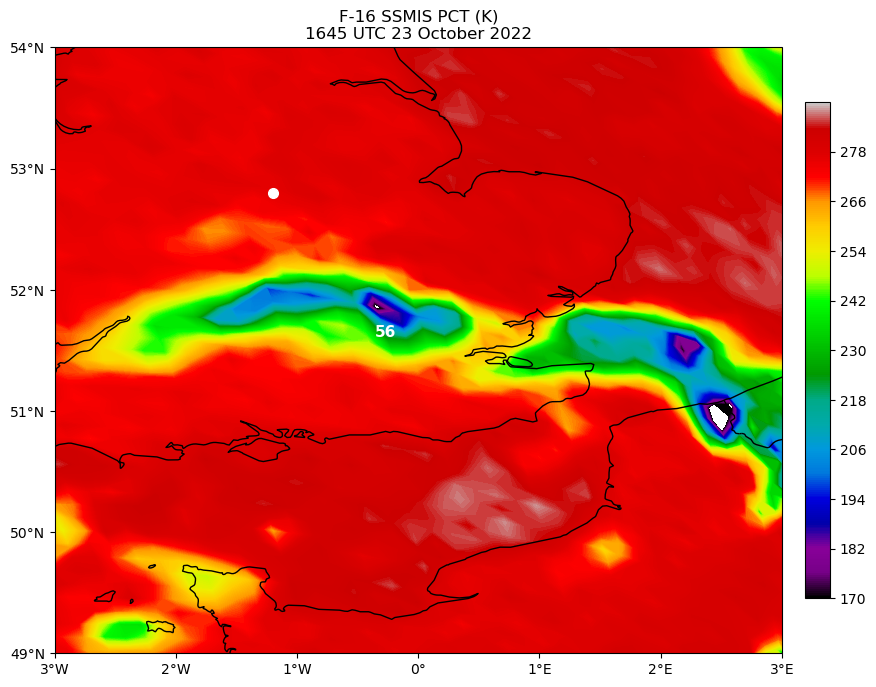

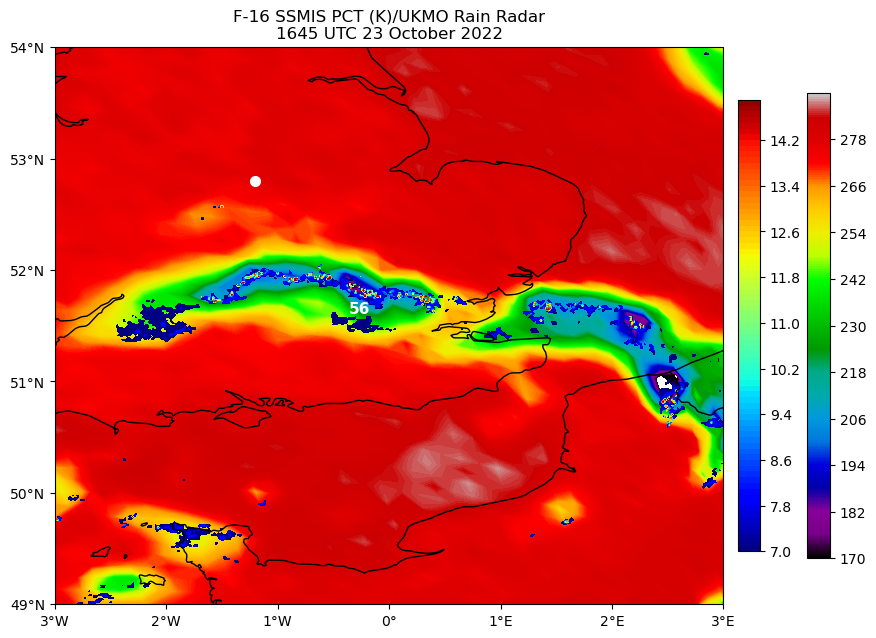

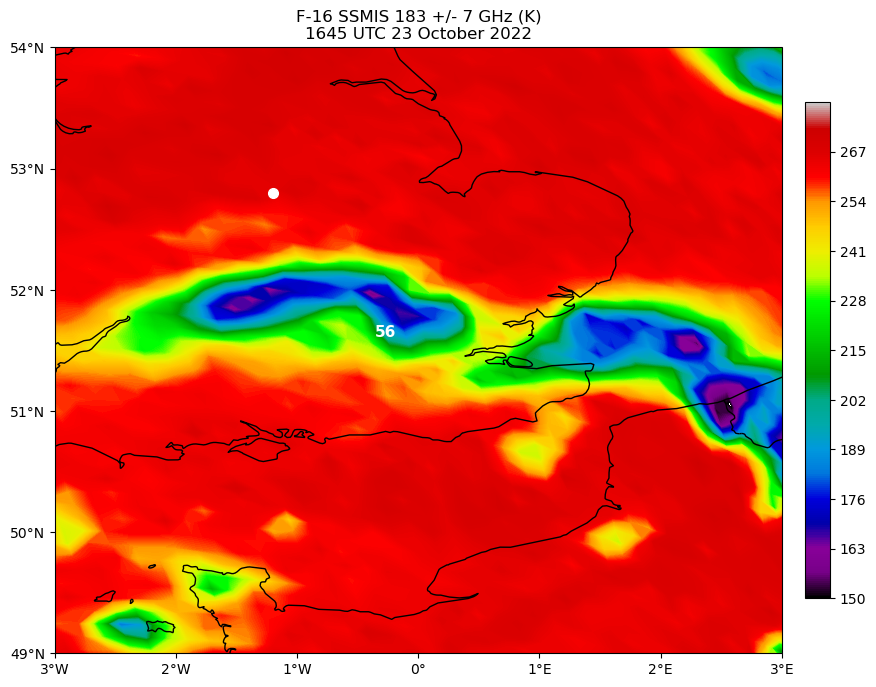

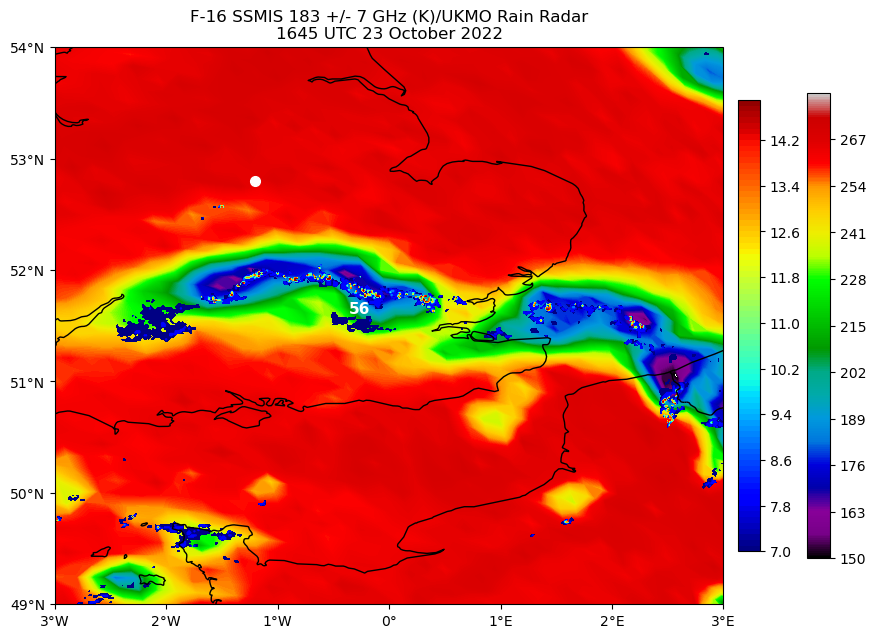

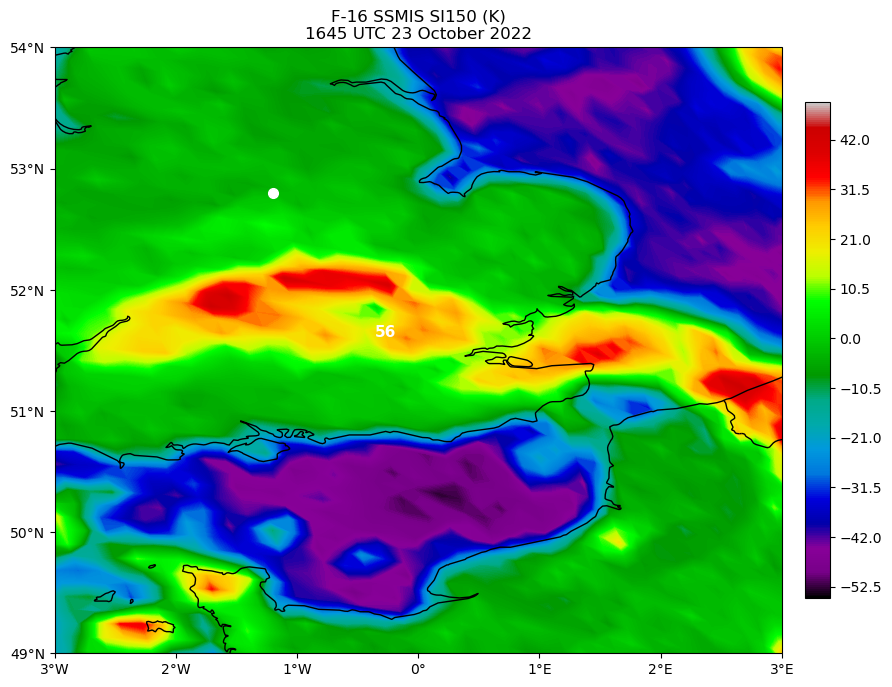

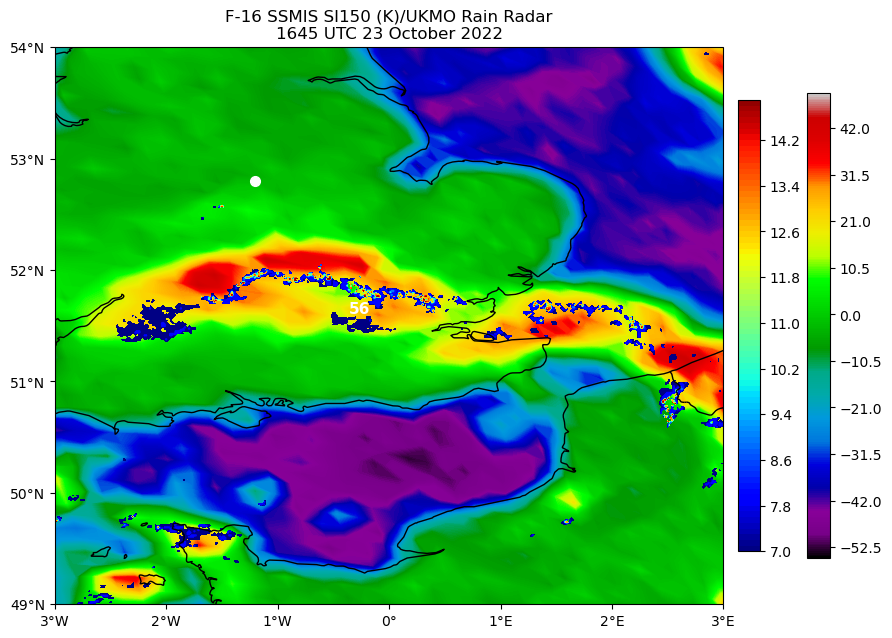

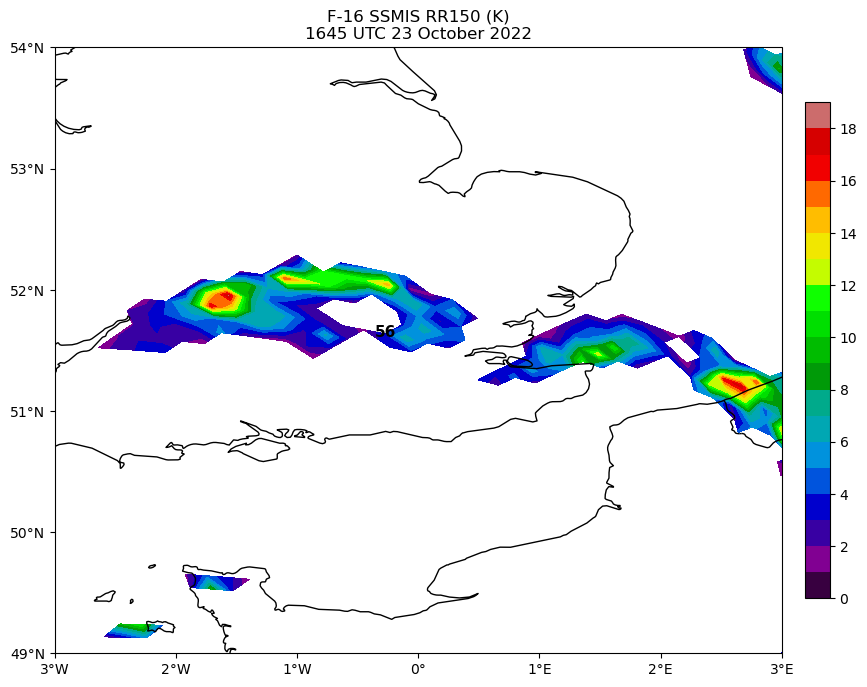

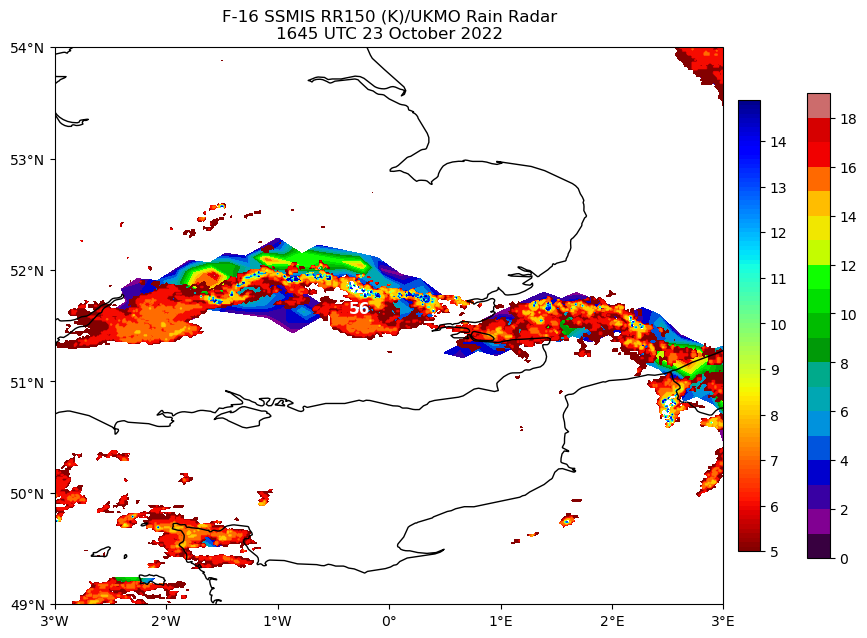

In [3]:
SI150 = TB1 - TB3
SI150_max = np.amax(SI150)
SI150_min = np.amin(SI150)
print("SI150 max =", SI150_max)
print("SI150 min =", SI150_min)
print("SI150 = ", SI150, SI150.shape)

RR150 = 0.00144 * ((SI150)**2.485)
RR150_max = np.amax(RR150)
RR150_min = np.amin(RR150)
print("RR150 max =", RR150_max)
print("RR150 min =", RR150_min)
print("RR150 = ", RR150, RR150.shape)

PCT = (1.818*TB2)-(0.818*TB1)
PCTmn = np.mean(PCT)
print("PCT mean = ", PCTmn)
PCT_max = np.amax(PCT)
PCT_min = np.amin(PCT)
print("PCT max =", PCT_max)
print("PCT min =", PCT_min)
print("PCT = ", PCT, PCT.shape)

def make_RR150_mask(RR150):
    RR150_1 = ma.masked_where(RR150 < 1, RR150)
    print('RR150_1 =', RR150_1)
    print('RR150_1 shape', RR150_1.shape)
    return RR150_1

RR150_1 = make_RR150_mask(RR150) 

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('F-16 SSMIS PCT (K)\n'
          '1645 UTC 23 October 2022')

Tlevels = np.arange(170,290,0.1)
cbtd = ax.contourf(lons,lats,PCT,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_pct_1645.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('F-16 SSMIS PCT (K)/UKMO Rain Radar\n'
          '1645 UTC 23 October 2022')

Tlevels = np.arange(170,290,0.1)
cbtd = ax.contourf(lons,lats,PCT,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
RRlevels = np.arange(7,15,0.1)
cRR = ax.contourf(lonz_uk,latz_uk,RR_7_UK,RRlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=7,vmax=15)

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.03,pad=0.06)
cbar2=plt.colorbar(cRR,fraction=0.032,pad=0.02)
plt.savefig("ssmis_pct_ukmo_rr_1645.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('F-16 SSMIS 183 +/- 7 GHz (K)\n'
          '1645 UTC 23 October 2022')

Tlevels = np.arange(150,280,0.1)
cbtd = ax.contourf(lons,lats,TB4,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_183_7h_1645.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('F-16 SSMIS 183 +/- 7 GHz (K)/UKMO Rain Radar\n'
          '1645 UTC 23 October 2022')

Tlevels = np.arange(150,280,0.1)
cbtd = ax.contourf(lons,lats,TB4,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
RRlevels = np.arange(7,15,0.1)
cRR = ax.contourf(lonz_uk,latz_uk,RR_7_UK,RRlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=7,vmax=15)

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.03,pad=0.06)
cbar2=plt.colorbar(cRR,fraction=0.032,pad=0.02)
plt.savefig("ssmis_183_7h_ukmo_rr_1645.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('F-16 SSMIS SI150 (K)\n'
          '1645 UTC 23 October 2022')

Tlevels = np.arange(-55,50,0.1)
cbtd = ax.contourf(lons,lats,SI150,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_SI150_1645.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('F-16 SSMIS SI150 (K)/UKMO Rain Radar\n'
          '1645 UTC 23 October 2022')

Tlevels = np.arange(-55,50,0.1)
cbtd = ax.contourf(lons,lats,SI150,Tlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
RRlevels = np.arange(7,15,0.1)
cRR = ax.contourf(lonz_uk,latz_uk,RR_7_UK,RRlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet',vmin=7,vmax=15)

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.03,pad=0.06)
cbar2=plt.colorbar(cRR,fraction=0.032,pad=0.02)
plt.savefig("ssmis_SI150_ukmo_rr_1645.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('F-16 SSMIS RR150 (K)\n'
          '1645 UTC 23 October 2022')

RRlevels = np.arange(0,20,1)
cbtd = ax.contourf(lons,lats,RR150_1,RRlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='black', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("ssmis_RR150_1645.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('F-16 SSMIS RR150 (K)/UKMO Rain Radar\n'
          '1645 UTC 23 October 2022')

RRlevels_ssmis = np.arange(0,20,1)
cbtd = ax.contourf(lons,lats,RR150_1,RRlevels_ssmis,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='nipy_spectral')
RRlevels = np.arange(5,15,0.1)
cRR = ax.contourf(lonz_uk,latz_uk,RR_5_UK,RRlevels,extent=img_extent, transform=crs.PlateCarree(globe=None),cmap='jet_r',vmin=5,vmax=15)

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar1=plt.colorbar(cbtd,fraction=0.03,pad=0.06)
cbar2=plt.colorbar(cRR,fraction=0.032,pad=0.02)
plt.savefig("ssmis_RR150_ukmo_rr_1645.png",dpi=250,bbox_inches='tight')
plt.show()

In [2]:
from __future__ import print_function, division
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.ma as ma
import h5py
import cartopy.crs as crs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.cm as cm

In [3]:
plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20221023-S150000-E152959.0900.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_1500 = dset[0,:,:]
    print(cal_precip_1500,cal_precip_1500.shape)
    latitude_1500 = f[LATITUDE]
    lat_1500 = latitude_1500[:]
    print(lat_1500,lat_1500.shape)
    longitude_1500 = f[LONGITUDE]
    lon_1500 = longitude_1500[:]
    print(lon_1500,lon_1500.shape)

lat_imerg_1500,lon_imerg_1500 = np.meshgrid(lat_1500,lon_1500)
print(lat_imerg_1500,lat_imerg_1500.shape)
print(lon_imerg_1500,lon_imerg_1500.shape)
cal_precip_1500_max = np.amax(cal_precip_1500)
cal_precip_1500_min = np.amin(cal_precip_1500)
print("precip max =", cal_precip_1500_max)
print("precip min =", cal_precip_1500_min)
del_precip_1500 = np.gradient(cal_precip_1500)
del_precip_1500_x = del_precip_1500[0]
del_precip_1500_y = del_precip_1500[1]
print("Precip Gradient X = ", del_precip_1500_x)
print("Precip Gradient Y = ", del_precip_1500_y)
mag_1500 = np.sqrt(del_precip_1500[0]**2 + del_precip_1500[1]**2)
print("Precip Gradient = ", mag_1500)
cal_precip_1500[cal_precip_1500>3] = 2.7
mag_1500[mag_1500>6] = 2.5

# Open file.
FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20221023-S153000-E155959.0930.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_1530 = dset[0,:,:]
    print(cal_precip_1530,cal_precip_1530.shape)
    latitude_1530 = f[LATITUDE]
    lat_1530 = latitude_1530[:]
    print(lat_1530,lat_1530.shape)
    longitude_1530 = f[LONGITUDE]
    lon_1530 = longitude_1530[:]
    print(lon_1530,lon_1530.shape)

lat_imerg_1530,lon_imerg_1530 = np.meshgrid(lat_1530,lon_1530)
print(lat_imerg_1530,lat_imerg_1530.shape)
print(lon_imerg_1530,lon_imerg_1530.shape)
cal_precip_1530_max = np.amax(cal_precip_1530)
cal_precip_1530_min = np.amin(cal_precip_1530)
print("precip max =", cal_precip_1530_max)
print("precip min =", cal_precip_1530_min)
del_precip_1530 = np.gradient(cal_precip_1530)
del_precip_1530_x = del_precip_1530[0]
del_precip_1530_y = del_precip_1530[1]
print("Precip Gradient X = ", del_precip_1530_x)
print("Precip Gradient Y = ", del_precip_1530_y)
mag_1530 = np.sqrt(del_precip_1530[0]**2 + del_precip_1530[1]**2)
print("Precip Gradient = ", mag_1530)
cal_precip_1530[cal_precip_1530>3] = 2.7
mag_1530[mag_1530>6] = 2.5

plt.rcParams["figure.figsize"] = [8,8]
np.set_printoptions(suppress=True)

FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20221023-S160000-E162959.0960.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_1600 = dset[0,:,:]
    print(cal_precip_1600,cal_precip_1600.shape)
    latitude_1600 = f[LATITUDE]
    lat_1600 = latitude_1600[:]
    print(lat_1600,lat_1600.shape)
    longitude_1600 = f[LONGITUDE]
    lon_1600 = longitude_1600[:]
    print(lon_1600,lon_1600.shape)

lat_imerg_1600,lon_imerg_1600 = np.meshgrid(lat_1600,lon_1600)
print(lat_imerg_1600,lat_imerg_1600.shape)
print(lon_imerg_1600,lon_imerg_1600.shape)
cal_precip_1600_max = np.amax(cal_precip_1600)
cal_precip_1600_min = np.amin(cal_precip_1600)
print("precip max =", cal_precip_1600_max)
print("precip min =", cal_precip_1600_min)
del_precip_1600 = np.gradient(cal_precip_1600)
del_precip_1600_x = del_precip_1600[0]
del_precip_1600_y = del_precip_1600[1]
print("Precip Gradient X = ", del_precip_1600_x)
print("Precip Gradient Y = ", del_precip_1600_y)
mag_1600 = np.sqrt(del_precip_1600[0]**2 + del_precip_1600[1]**2)
print("Precip Gradient = ", mag_1600)
cal_precip_1600[cal_precip_1600>3] = 2.7
mag_1600[mag_1600>6] = 2.5

# Open file.
FILE_NAME = '3B-HHR-L.MS.MRG.3IMERG.20221023-S163000-E165959.0990.V06C.HDF5'
DATAFIELD_NAME = '/Grid/precipitationCal'
LATITUDE = '/Grid/lat'
LONGITUDE = '/Grid/lon'

with h5py.File(FILE_NAME, mode='r') as f:
    # List available datasets.
    print(f.keys())

    # Read dataset.
    dset = f[DATAFIELD_NAME]
    cal_precip_1630 = dset[0,:,:]
    print(cal_precip_1630,cal_precip_1630.shape)
    latitude_1630 = f[LATITUDE]
    lat_1630 = latitude_1630[:]
    print(lat_1630,lat_1630.shape)
    longitude_1630 = f[LONGITUDE]
    lon_1630 = longitude_1630[:]
    print(lon_1630,lon_1630.shape)

lat_imerg_1630,lon_imerg_1630 = np.meshgrid(lat_1630,lon_1630)
print(lat_imerg_1630,lat_imerg_1630.shape)
print(lon_imerg_1630,lon_imerg_1630.shape)
cal_precip_1630_max = np.amax(cal_precip_1630)
cal_precip_1630_min = np.amin(cal_precip_1630)
print("precip max =", cal_precip_1630_max)
print("precip min =", cal_precip_1630_min)
del_precip_1630 = np.gradient(cal_precip_1630)
del_precip_1630_x = del_precip_1630[0]
del_precip_1630_y = del_precip_1630[1]
print("Precip Gradient X = ", del_precip_1630_x)
print("Precip Gradient Y = ", del_precip_1630_y)
mag_1630 = np.sqrt(del_precip_1630[0]**2 + del_precip_1630[1]**2)
print("Precip Gradient = ", mag_1630)
cal_precip_1630[cal_precip_1630>3] = 2.7
mag_1630[mag_1630>6] = 2.5

<KeysViewHDF5 ['Grid']>
[[-9999.9 -9999.9 -9999.9 ...     0.      0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 ...
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]
 [-9999.9 -9999.9 -9999.9 ... -9999.9     0.      0. ]] (3600, 1800)
[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95] (1800,)
[-179.95 -179.85 -179.75 ...  179.75  179.85  179.95] (3600,)
[[-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 ...
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]
 [-89.95 -89.85 -89.75 ...  89.75  89.85  89.95]] (3600, 1800)
[[-179.95 -179.95 -179.95 ... -179.95 -179.95 -179.95]
 [-179.85 -179.85 -179.85 ... -179.85 -179.85 -179.85]
 [-179.75 -179.75 -179.75 ... -179.75 -179.75 -179.75]
 ...
 [ 179.75  179.75  179.75 

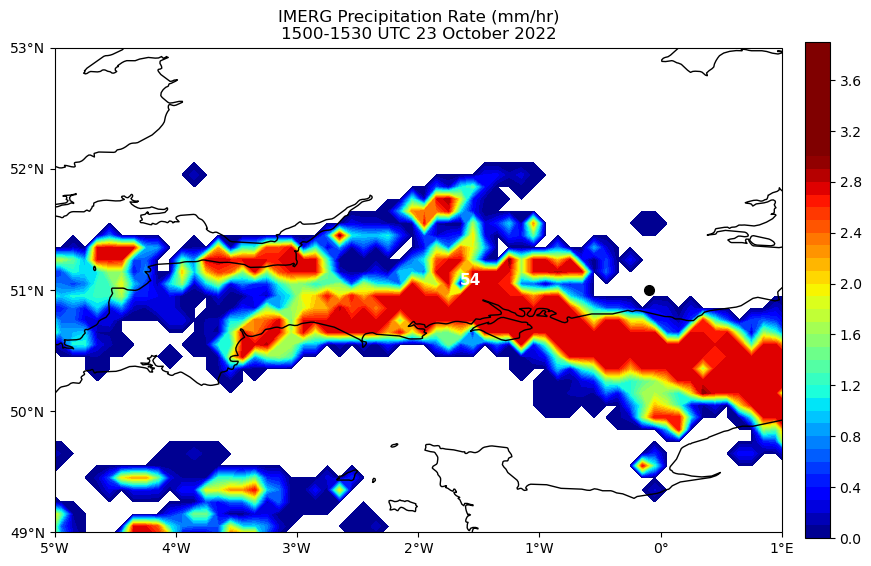

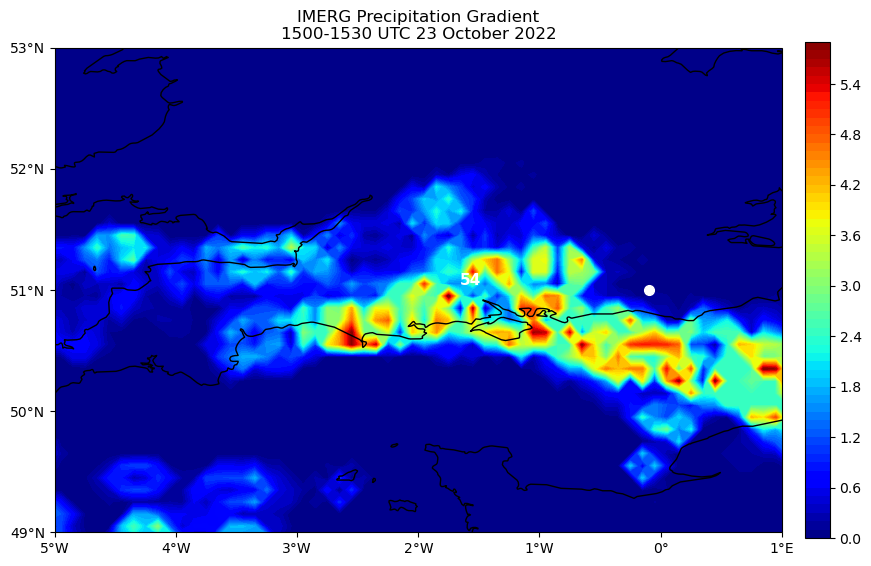

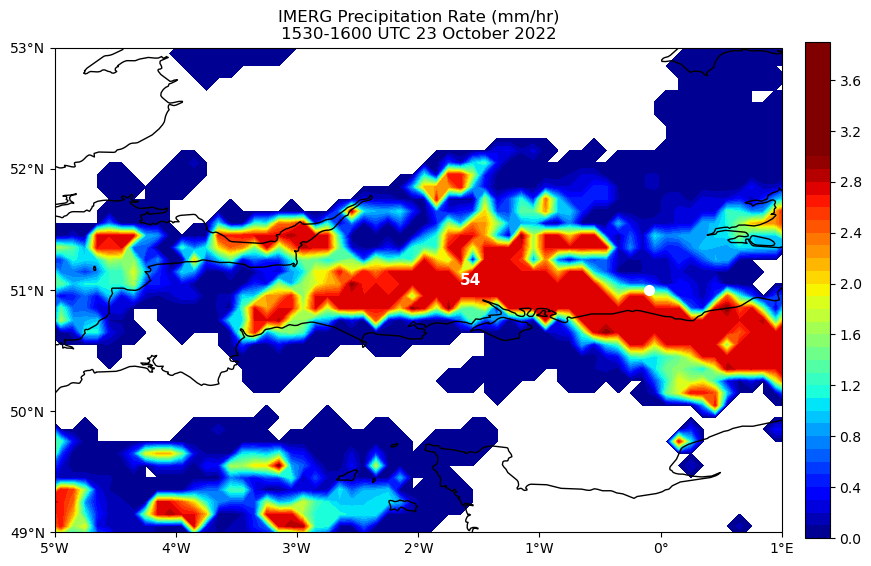

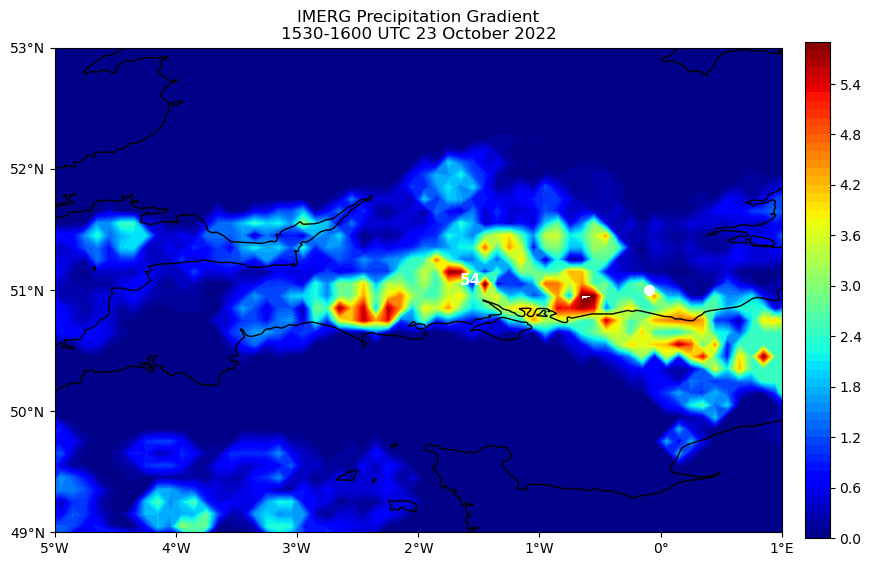

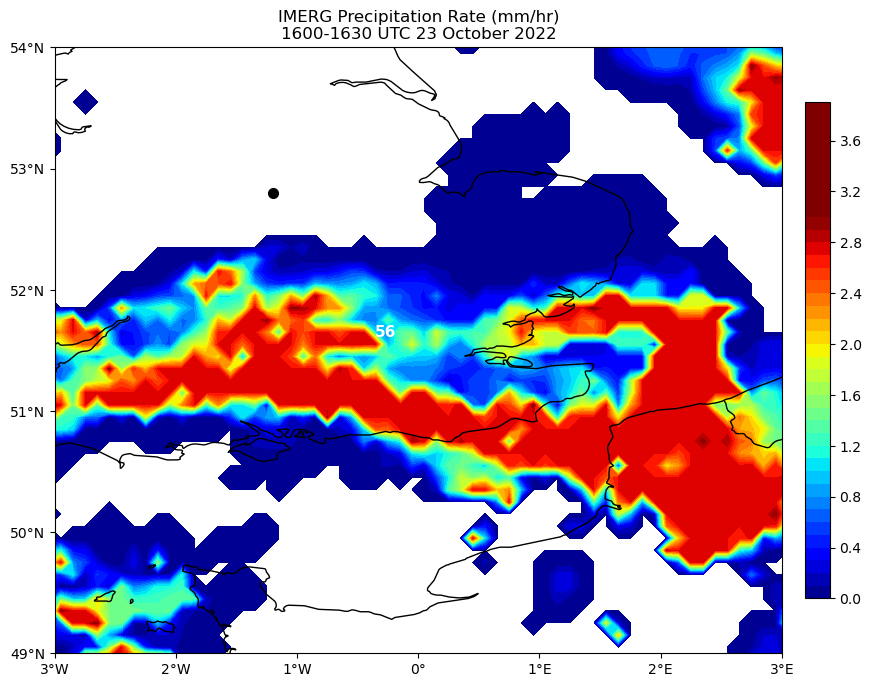

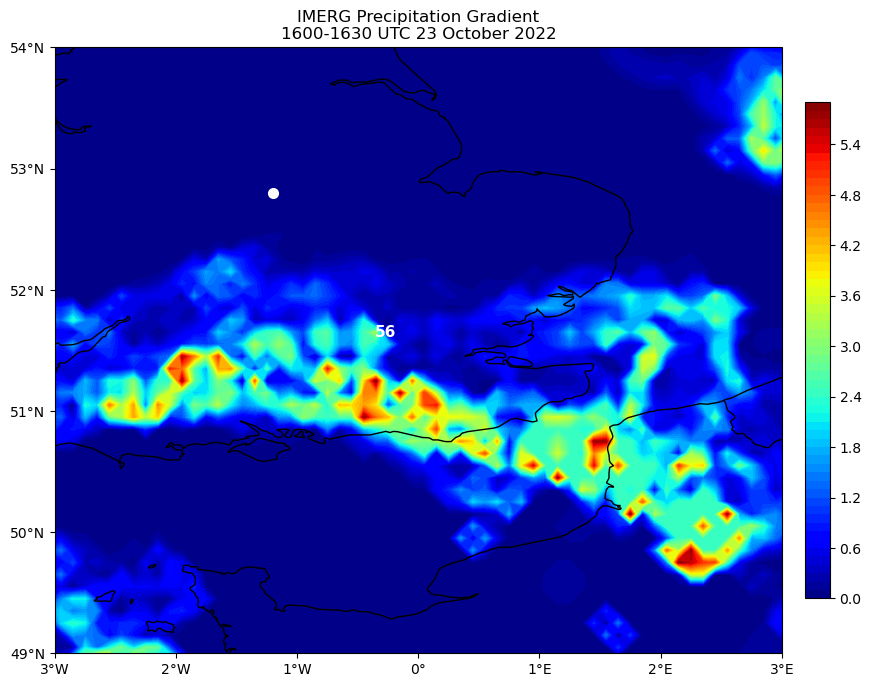

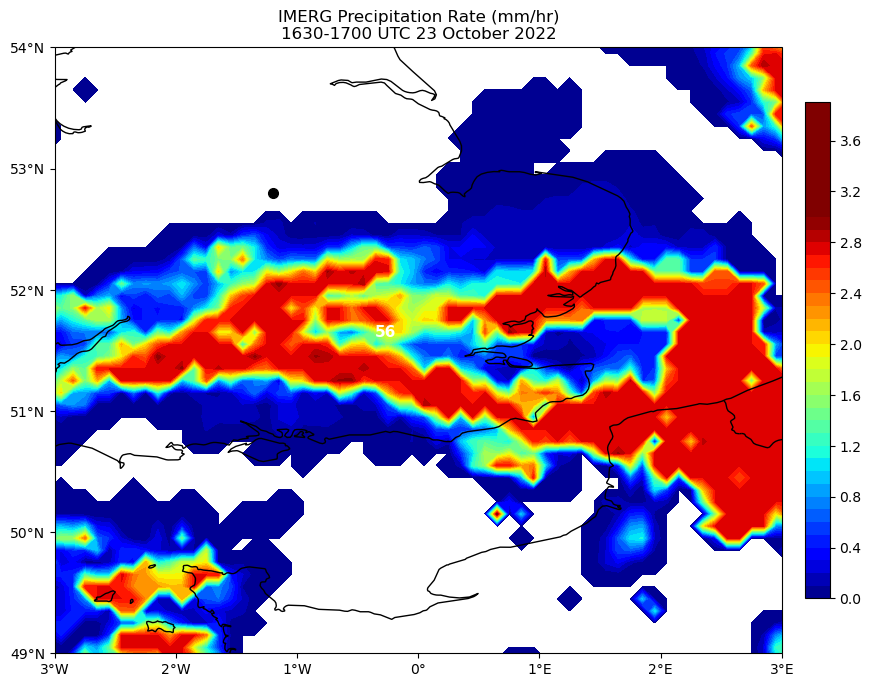

In [ ]:
fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '1500-1530 UTC 23 October 2022')

Plevels = np.arange(0,4,0.1)
cbtd = ax.contourf(lon_imerg_1500,lat_imerg_1500,cal_precip_1500,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=3)

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_1500.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '1500-1530 UTC 23 October 2022')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1500,lat_imerg_1500,mag_1500,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1500.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '1530-1600 UTC 23 October 2022')

Plevels = np.arange(0,4,0.1)
cbtd = ax.contourf(lon_imerg_1530,lat_imerg_1530,cal_precip_1530,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=3)

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_1530.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-5, 1, 49, 53)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-5, 1, 49, 53], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '1530-1600 UTC 23 October 2022')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1530,lat_imerg_1530,mag_1530,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-5,-4,-3,-2,-1,0,1])
ax.set_yticks([49,50,51,52,53])   

ax.plot(-0.1, 51.0, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-1.566596, 51.143141, '54', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1530.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '1600-1630 UTC 23 October 2022')

Plevels = np.arange(0,4,0.1)
cbtd = ax.contourf(lon_imerg_1600,lat_imerg_1600,cal_precip_1600,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=3)

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_1600.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '1600-1630 UTC 23 October 2022')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1600,lat_imerg_1600,mag_1600,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1600.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Rate (mm/hr)\n' 
          '1630-1700 UTC 23 October 2022')

Plevels = np.arange(0,4,0.1)
cbtd = ax.contourf(lon_imerg_1630,lat_imerg_1630,cal_precip_1630,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet',vmin=0,vmax=3)

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ok', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_precip_1630.png",dpi=250,bbox_inches='tight')
plt.show()

fig = plt.figure(figsize=(10, 12))
img_extent = (-3, 3, 49, 54)
ax = plt.axes(projection=crs.PlateCarree(globe=None))
ax.set_extent([-3, 3, 49, 54], crs.PlateCarree(globe=None))

plt.title('IMERG Precipitation Gradient\n' 
          '1630-1700 UTC 23 October 2022')

Plevels = np.arange(0,6,0.1)
cbtd = ax.contourf(lon_imerg_1630,lat_imerg_1630,mag_1630,Plevels,extent=img_extent,transform=crs.PlateCarree(globe=None),cmap='jet')

ax.set_xticks([-3,-2,-1,0,1,2,3])
ax.set_yticks([49,50,51,52,53,54])   

ax.plot(-1.2, 52.8, 'ow', markersize=7, transform=crs.Geodetic())
ax.text(-0.269018, 51.714132, '56', color='white', weight='bold', fontsize=11, ha='center', va='top', style='normal', transform=crs.Geodetic())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)

lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()

ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
cbar=plt.colorbar(cbtd,fraction=0.032,pad=0.03)
plt.savefig("imerg_del_precip_1630.png",dpi=250,bbox_inches='tight')
plt.show()